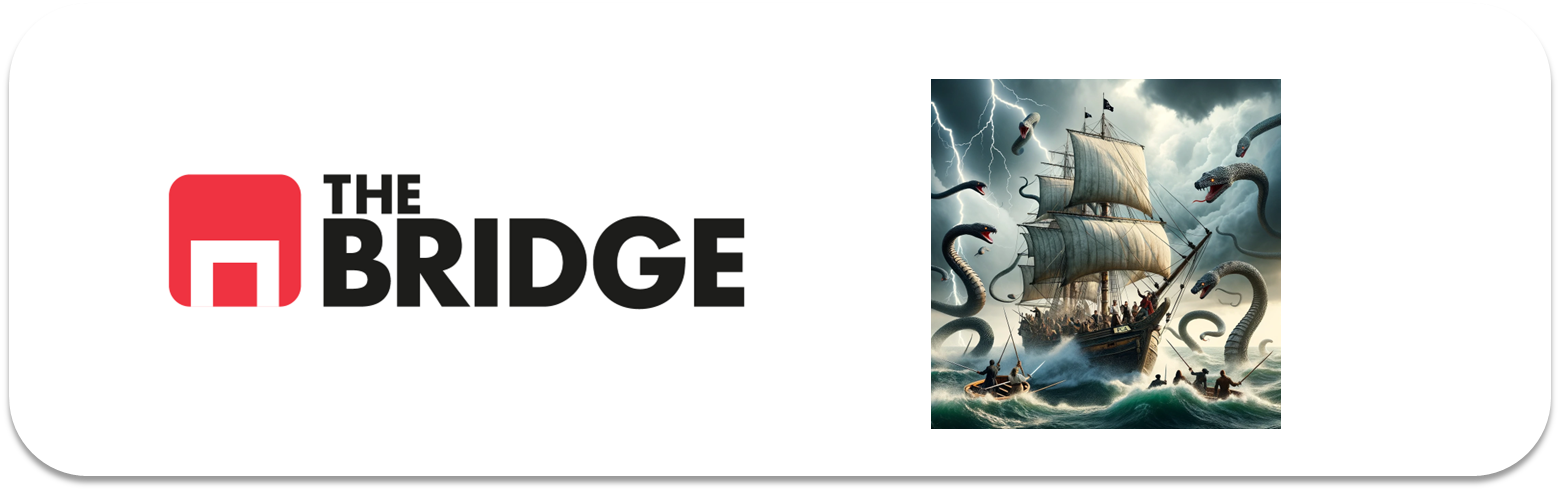

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [86]:
import bootcampviztools as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from scipy.stats import pearsonr
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [46]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [47]:
# Vemos los nulos que hay
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [48]:
# Nos deshacemos de los nulos
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [49]:
# convertimos las que consideremos en categóricas de 2 o 3 niveles. Vamos a renombrarlas para trabajar mejor
df.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'30-59D','NumberOfOpenCreditLinesAndLoans':'OpenCredits','NumberOfTimes90DaysLate':'90DLate','NumberRealEstateLoansOrLines':'RealEstate','NumberOfTime60-89DaysPastDueNotWorse':'60-89D','NumberOfDependents':'Dependents'},inplace=True)
df[['30-59D','OpenCredits','90DLate','RealEstate','60-89D','Dependents']].describe()

,30-59D,OpenCredits,90DLate,RealEstate,60-89D,Dependents
count,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000
mean,0.340471,8.759140,0.180010,1.059580,0.149712,0.856804
std,2.927409,5.129772,2.892577,1.140716,2.868248,1.147509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,98.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   30-59D                                11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   OpenCredits                           11816 non-null  int64  
 7   90DLate                               11816 non-null  int64  
 8   RealEstate                            11816 non-null  int64  
 9   60-89D                                11816 non-null  int64  
 10  Dependents                            11816 non-null  float64
dtypes: float64(4), int64

In [51]:
# Vamos a ver como poner los limites
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,30-59D,DebtRatio,MonthlyIncome,OpenCredits,90DLate,RealEstate,60-89D,Dependents
count,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000
mean,0.070244,0.335668,51.447698,0.340471,0.499708,6864.815420,8.759140,0.180010,1.059580,0.149712,0.856804
std,0.255568,0.365209,14.516270,2.927409,2.696067,11855.905437,5.129772,2.892577,1.140716,2.868248,1.147509
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034927,41.000000,0.000000,0.143456,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.179183,51.000000,0.000000,0.294748,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.587187,62.000000,0.000000,0.477414,8300.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,6.000000,101.000000,98.000000,96.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [52]:
# Defino una función para aplicar y realizar el cambio a categoricas
def ajusta(x,columna,umbral1,umbral2=None):
    if x < umbral1:
        resultado = 0
    elif (umbral2 != None):
        if x < umbral2:
            resultado = 1
        else:
            resultado = 2
    else:
            resultado = 1
    return resultado

# Defino las columnas a aplicar
columnas = ['30-59D','OpenCredits','90DLate','RealEstate','60-89D','Dependents']
# Defino umbrales1 y umbrales2, en caso de no haber umbrales2 dejaré None
umbrales1 = [0.34,8.75,0.18,1.05,0.14,0.85]
umbrales2 = [None,11,None,2,None,2]

# Aplico la función
for col,u1,u2 in zip(columnas,umbrales1,umbrales2):
    df[col] = df[col].apply(ajusta, args=[col,u1,u2])
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,30-59D,DebtRatio,MonthlyIncome,OpenCredits,90DLate,RealEstate,60-89D,Dependents
0,0,0.081892,37,0,0.070709,5656.0,2,1,0,0,0
1,0,0.023413,74,0,0.209197,4870.0,1,0,0,0,0
2,0,0.000000,43,0,0.080784,5000.0,0,0,0,0,2
3,0,0.492754,44,0,0.412735,7333.0,0,0,2,0,2
4,0,1.000000,63,0,0.000000,8333.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,0,0,0,0,0
12533,0,0.036726,62,0,0.884985,5833.0,2,0,0,0,0
12534,0,0.120313,49,0,0.577676,6333.0,0,0,2,0,2
12535,0,0.252566,63,0,0.037640,14000.0,1,0,0,0,1


In [53]:
# MINI EDA

<Axes: xlabel='SeriousDlqin2yrs', ylabel='percent'>

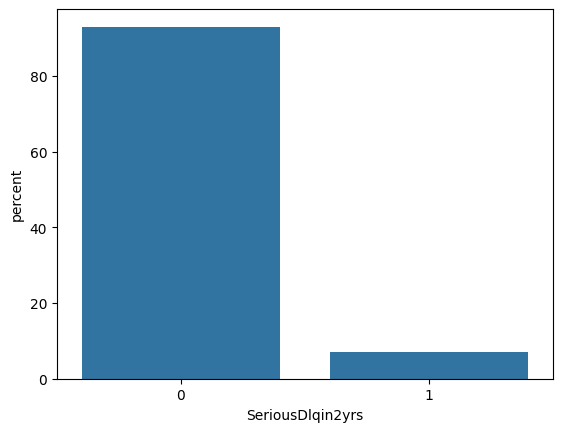

In [54]:
# Vamos a ver como de balanceado está el target

target = 'SeriousDlqin2yrs'

sns.countplot(df,x='SeriousDlqin2yrs',stat='percent')

In [55]:
# Separo en Train y test

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df,test_size=0.2,random_state=42,stratify=df[target])
X_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,30-59D,DebtRatio,MonthlyIncome,OpenCredits,90DLate,RealEstate,60-89D,Dependents
2031,0,0.039187,61,0,0.269356,3073.0,0,0,2,0,0
10352,0,0.919317,41,0,0.162696,3945.0,0,0,0,0,0
497,0,0.253718,49,0,0.247302,13250.0,2,0,2,0,0
10341,0,0.249462,26,0,0.882353,764.0,0,0,0,0,0
4043,0,0.224520,76,0,0.462710,3150.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4371,0,0.174437,61,0,0.704053,7203.0,0,0,0,0,0
5767,0,0.039651,64,0,0.121458,15667.0,0,0,0,0,0
7494,0,1.000000,29,0,0.000000,2040.0,0,0,0,0,2
11693,0,0.945805,51,1,0.671629,4500.0,2,0,0,0,0


In [56]:
# Separo entre X y target.

y_train = X_train[target]
y_test = X_test[target]
y_train

2031     0
10352    0
497      0
10341    0
4043     0
        ..
4371     0
5767     0
7494     0
11693    0
5231     0
Name: SeriousDlqin2yrs, Length: 9452, dtype: int64

In [57]:
X_train = X_train.drop([target],axis=1)
X_test = X_test.drop([target],axis=1)

In [58]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,30-59D,DebtRatio,MonthlyIncome,OpenCredits,90DLate,RealEstate,60-89D,Dependents
2031,0.039187,61,0,0.269356,3073.0,0,0,2,0,0
10352,0.919317,41,0,0.162696,3945.0,0,0,0,0,0
497,0.253718,49,0,0.247302,13250.0,2,0,2,0,0
10341,0.249462,26,0,0.882353,764.0,0,0,0,0,0
4043,0.224520,76,0,0.462710,3150.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4371,0.174437,61,0,0.704053,7203.0,0,0,0,0,0
5767,0.039651,64,0,0.121458,15667.0,0,0,0,0,0
7494,1.000000,29,0,0.000000,2040.0,0,0,0,0,2
11693,0.945805,51,1,0.671629,4500.0,2,0,0,0,0


In [59]:
# junto el target para el analisis
X_train_compl = X_train.copy()
X_train_compl[target] = y_train

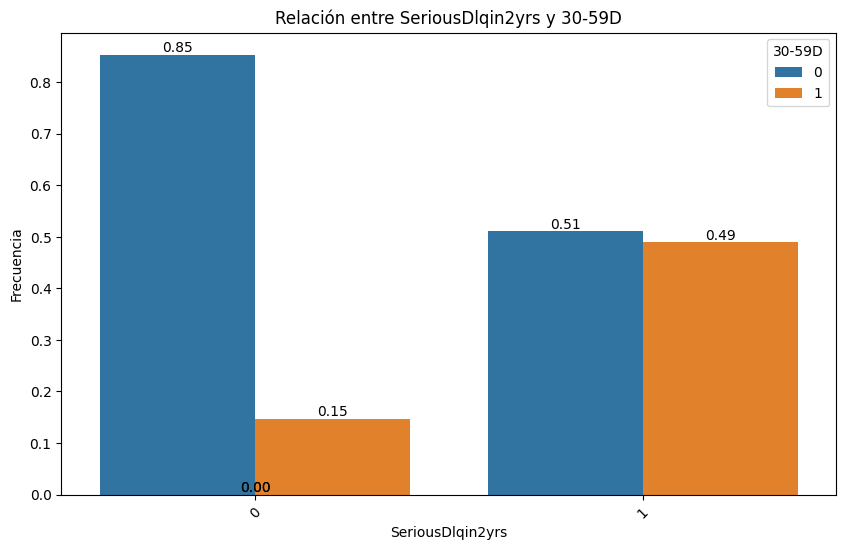

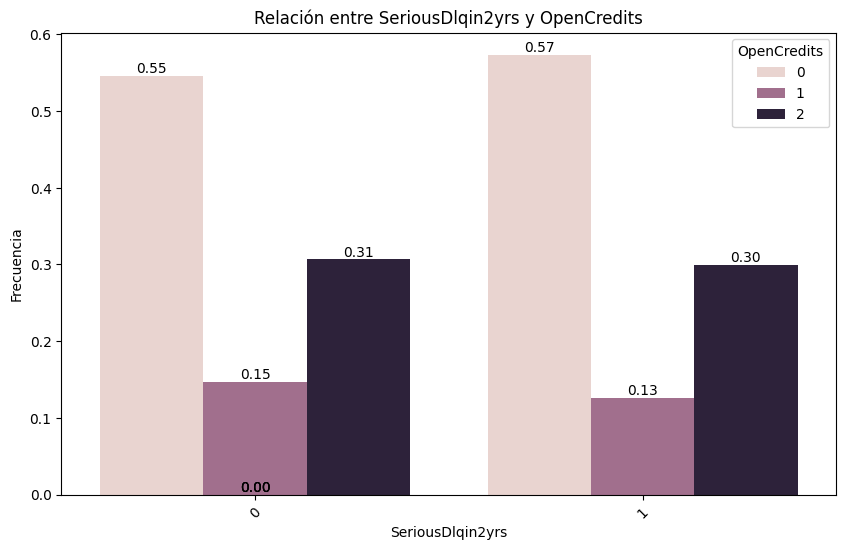

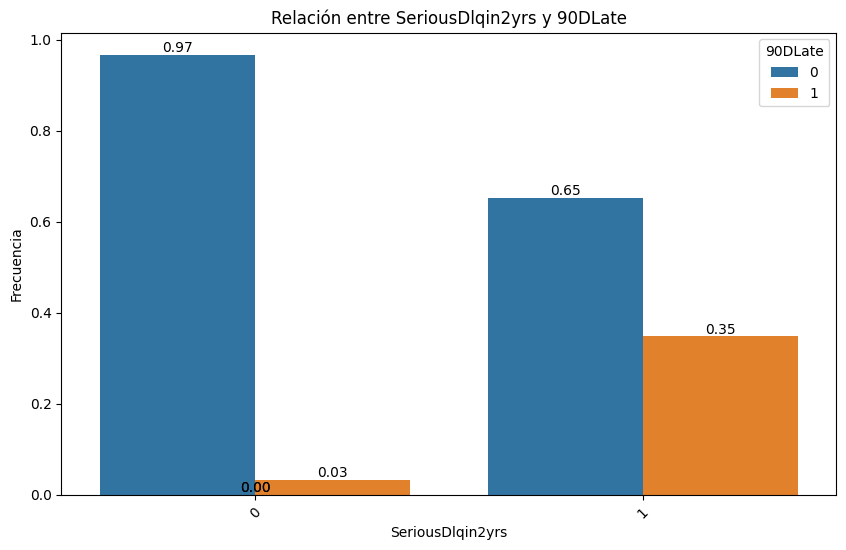

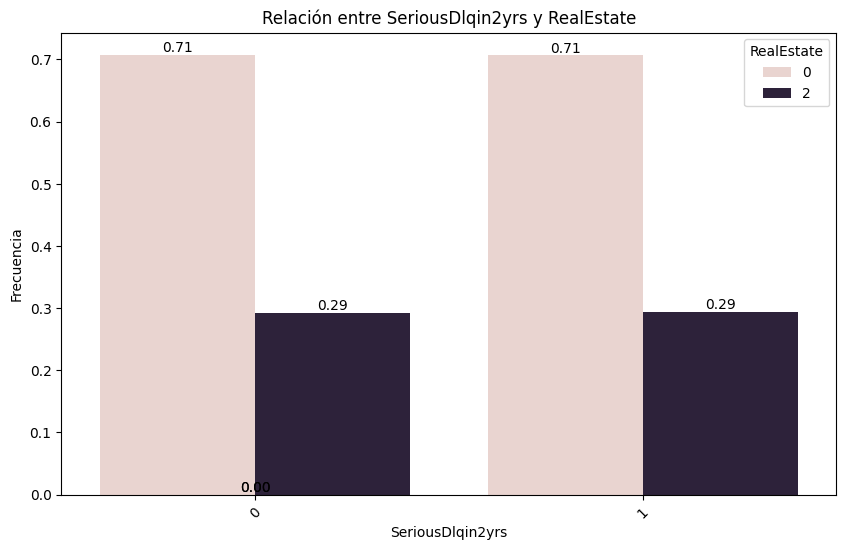

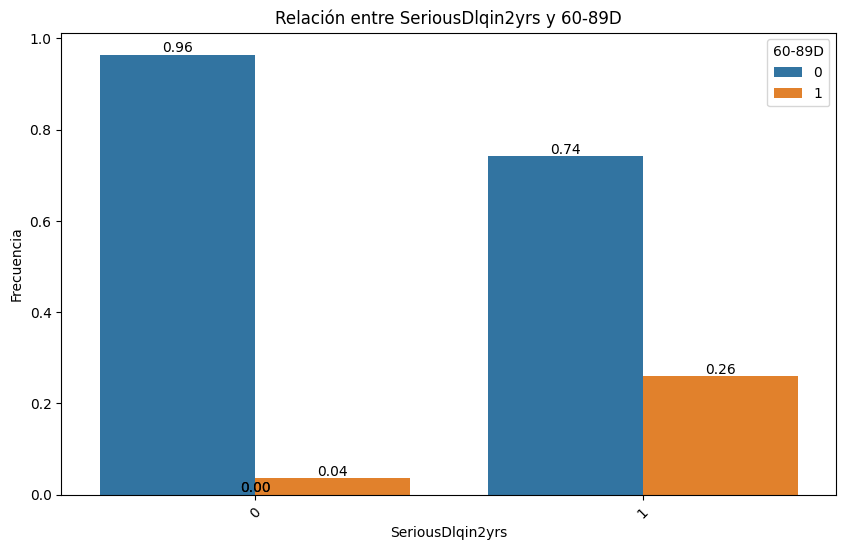

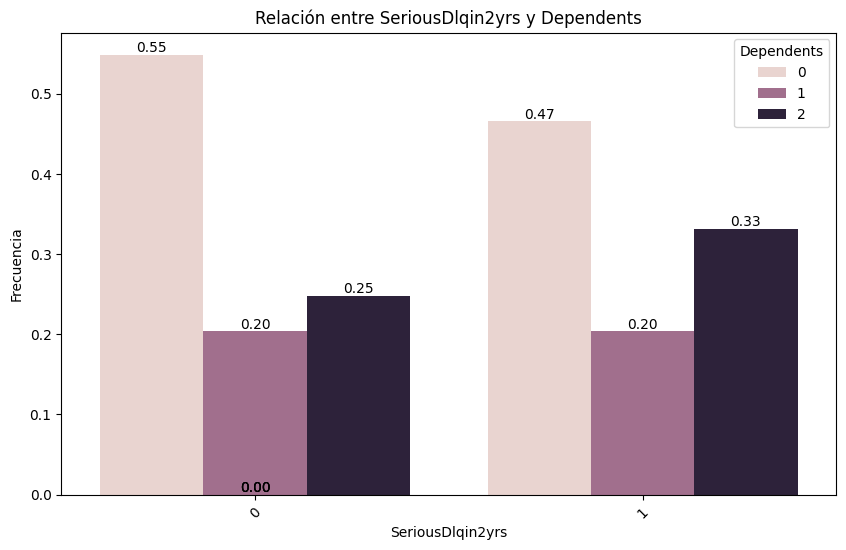

In [60]:
# Vamos a comprobar las numéricas y las categóricas
numericas = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome']
categoricas = ['30-59D','OpenCredits','90DLate','RealEstate','60-89D','Dependents']

for cat_col in categoricas:
    bt.plot_categorical_relationship_fin(X_train_compl,target,cat_col,show_values= True, relative_freq= True)

In [61]:
# De las gráficas vemos que las más representativas serían aquellas cuya distribución sea distinta
# para el modelo serían:
# 30-59D, 90DLate, 60-89D y ligeramente Dependents

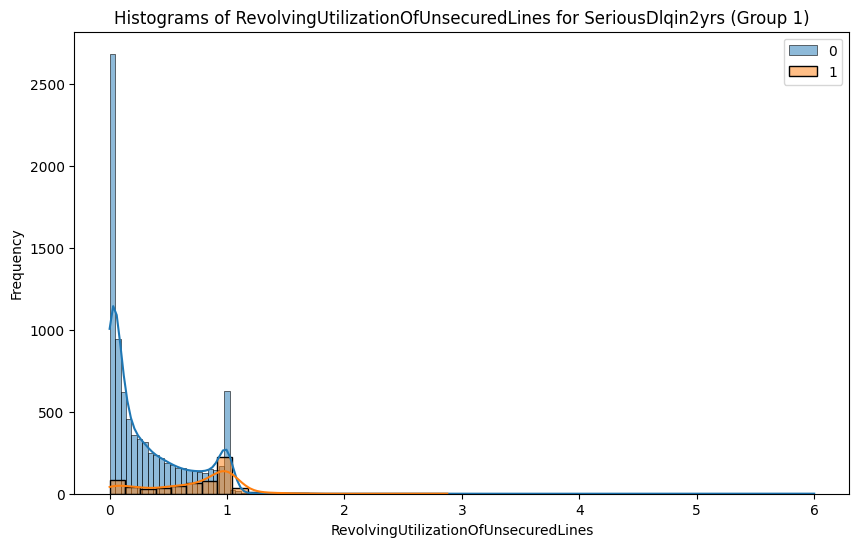

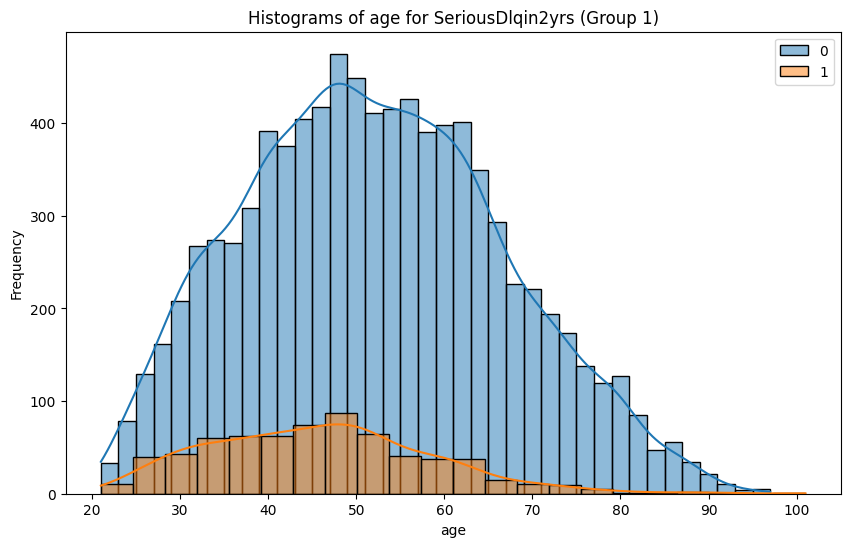

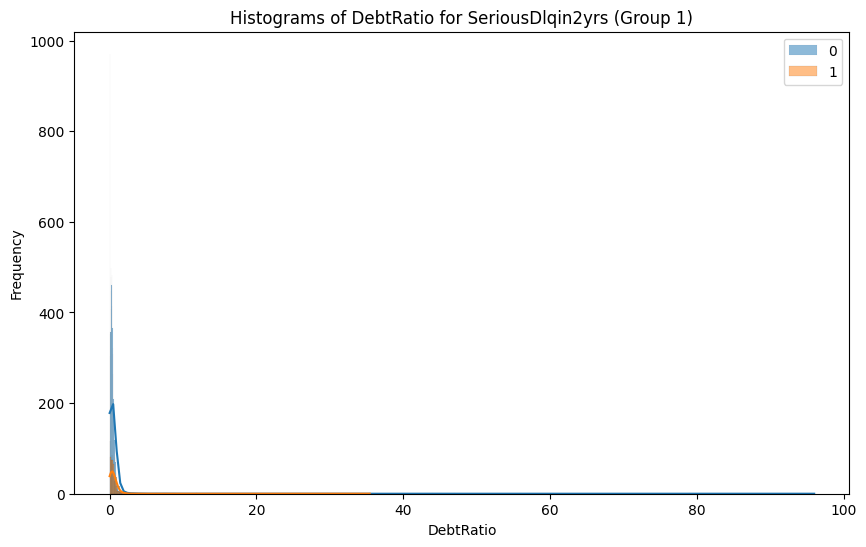

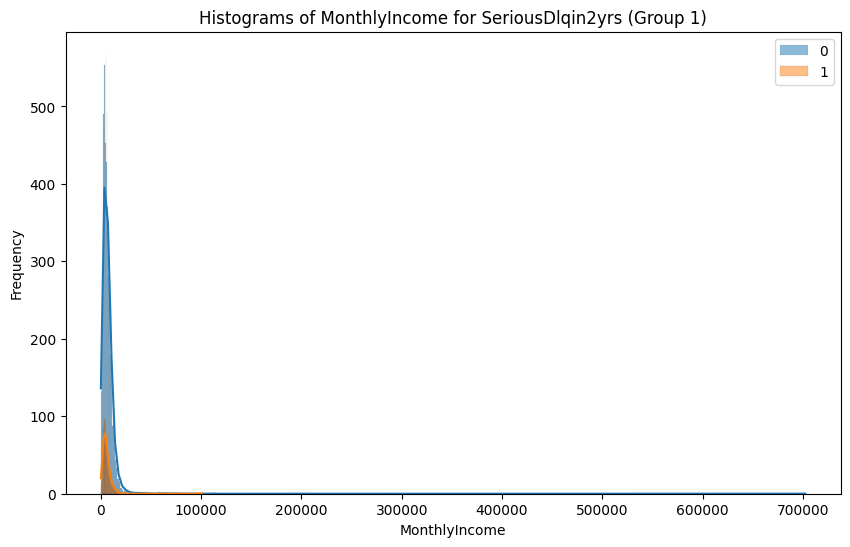

In [62]:
# Comprobamos las numéricas
for col in numericas:
    bt.plot_grouped_histograms(X_train_compl,cat_col = target, num_col= col, group_size= 2)

In [63]:
# Las numericas eran RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome
# De ellas las dos primeras tienen grandes diferencias mientras que las dos ultimas no son tan claras porque no tienen desplazamiento
# ni zonas de cruce entre los dos histogramas.

# Por lo tanto mi seleccion sería momento:
# 30-59D, 90DLate, 60-89D, Dependents, RevolvingUtilizationOfUnsecuredLines y age


In [64]:
X_train_compl

,RevolvingUtilizationOfUnsecuredLines,age,30-59D,DebtRatio,MonthlyIncome,OpenCredits,90DLate,RealEstate,60-89D,Dependents,SeriousDlqin2yrs
2031,0.039187,61,0,0.269356,3073.0,0,0,2,0,0,0
10352,0.919317,41,0,0.162696,3945.0,0,0,0,0,0,0
497,0.253718,49,0,0.247302,13250.0,2,0,2,0,0,0
10341,0.249462,26,0,0.882353,764.0,0,0,0,0,0,0
4043,0.224520,76,0,0.462710,3150.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4371,0.174437,61,0,0.704053,7203.0,0,0,0,0,0,0
5767,0.039651,64,0,0.121458,15667.0,0,0,0,0,0,0
7494,1.000000,29,0,0.000000,2040.0,0,0,0,0,2,0
11693,0.945805,51,1,0.671629,4500.0,2,0,0,0,0,0


In [65]:
# Filtramos por umbrales de correlación
numericas.append(target)
corr= X_train_compl[numericas].corr()

<Axes: >

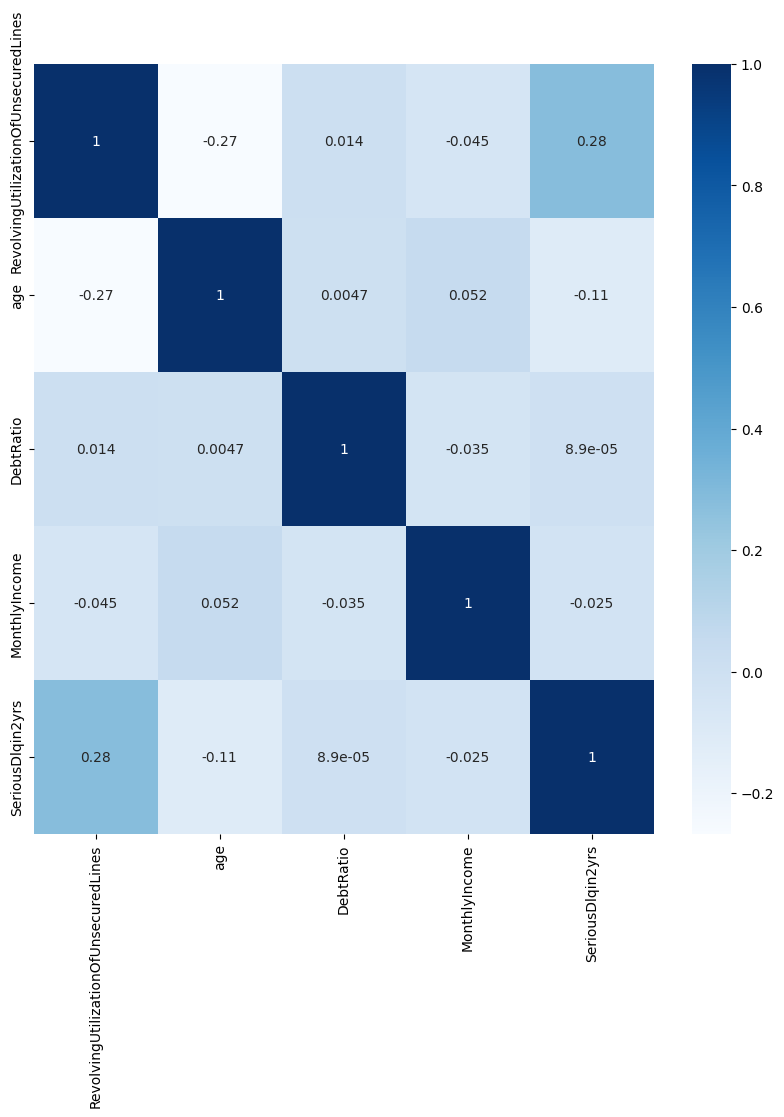

In [66]:


plt.figure(figsize=(10,10))
sns.heatmap(corr[numericas], annot= True, cmap= "Blues")

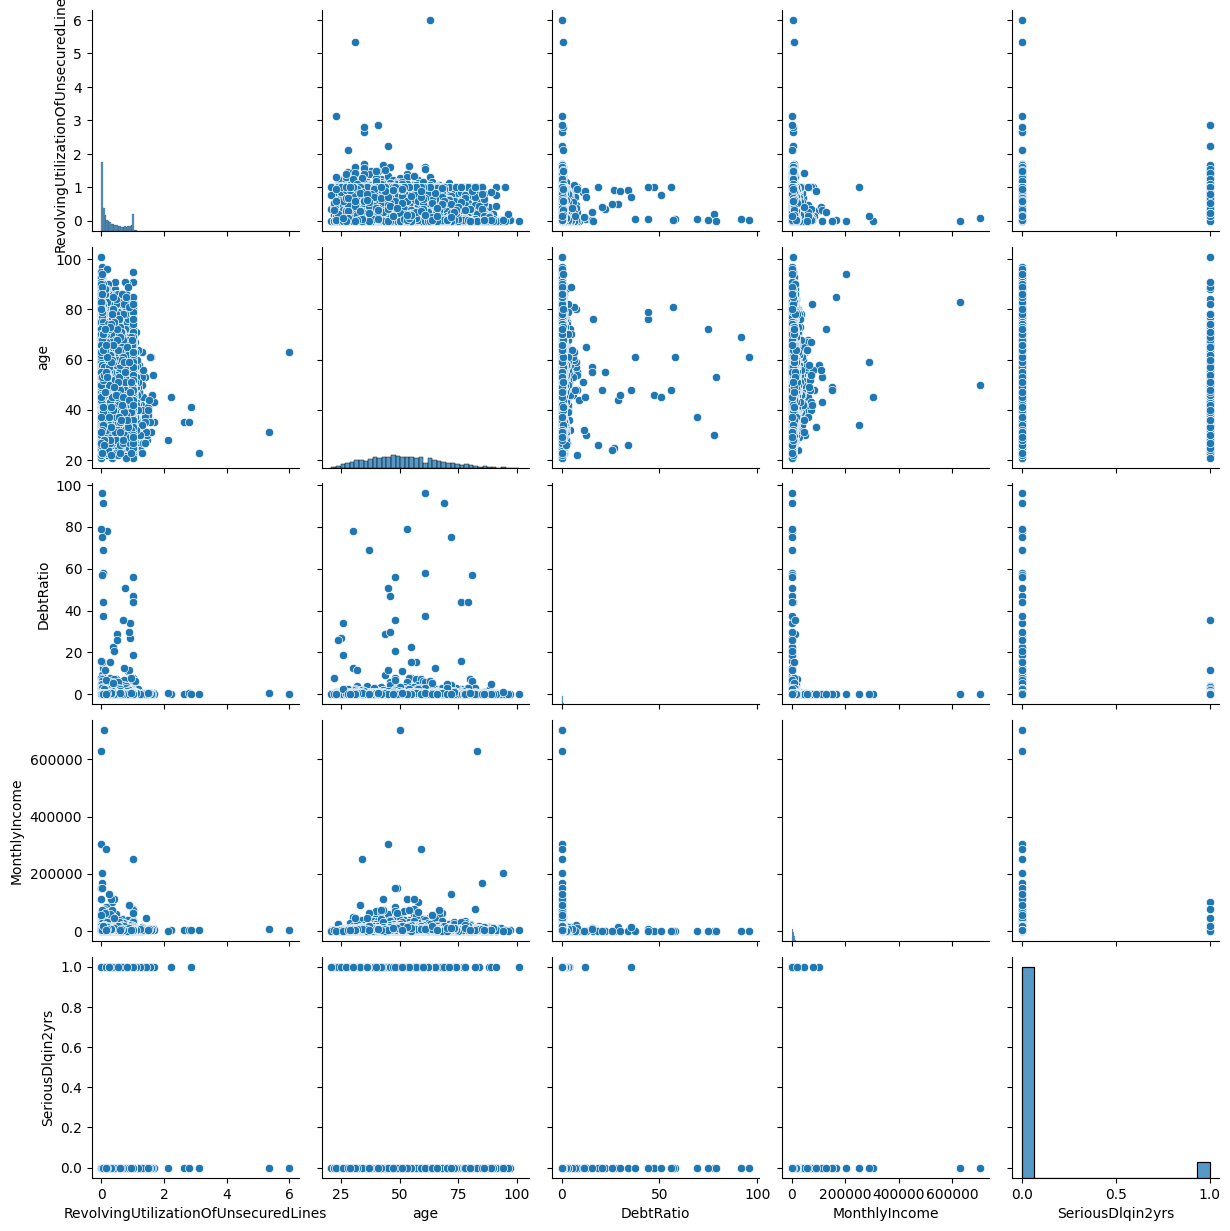

In [67]:
# Vemos que no exite una correlación entre las features salvo una pequeña relación entre age y RevolvingUtilizationOfUnsecuredLines
sns.pairplot(X_train_compl[numericas])

In [69]:
# Vemos que no hay relación lineal clara entre los valores por lo que no descarto numéricas

In [70]:
# Ahora comprobamos la mutual information para descartar categóricas

categoricas.append(target)
for col in categoricas:
    print(f"MI({col};{target}):", mutual_info_score(X_train_compl[col],X_train_compl[target]))

MI(30-59D;SeriousDlqin2yrs): 0.020831100086090043
MI(OpenCredits;SeriousDlqin2yrs): 0.00015089014543412382
MI(90DLate;SeriousDlqin2yrs): 0.03315981105348048
MI(RealEstate;SeriousDlqin2yrs): 3.3532153348447835e-07
MI(60-89D;SeriousDlqin2yrs): 0.019220687427717945
MI(Dependents;SeriousDlqin2yrs): 0.0012626989717645712
MI(SeriousDlqin2yrs;SeriousDlqin2yrs): 0.25428431997312284


In [71]:
# Vemos que opencredits, real estate y Dependents tienen poca información sobre SeriousDlqin2yrs
# Vemos entre ellas

categoricas.remove(target)
for col in categoricas:
    for col2 in categoricas:
        if col != col2:
            print(f"MI({col};{col2}):", mutual_info_score(X_train_compl[col],X_train_compl[col2]))


MI(30-59D;OpenCredits): 0.0012612043868970024
MI(30-59D;90DLate): 0.020163223126652252
MI(30-59D;RealEstate): 0.00024211180707897628
MI(30-59D;60-89D): 0.026794516600555415
MI(30-59D;Dependents): 0.0010050715847661623
MI(OpenCredits;30-59D): 0.0012612043868970024
MI(OpenCredits;90DLate): 0.006365659628495092
MI(OpenCredits;RealEstate): 0.05050217469834553
MI(OpenCredits;60-89D): 0.0006905480622757219
MI(OpenCredits;Dependents): 0.0013641810017717554
MI(90DLate;30-59D): 0.020163223126652252
MI(90DLate;OpenCredits): 0.006365659628495092
MI(90DLate;RealEstate): 0.0040267086611603595
MI(90DLate;60-89D): 0.02230529280489106
MI(90DLate;Dependents): 0.0002256817754934387
MI(RealEstate;30-59D): 0.00024211180707897628
MI(RealEstate;OpenCredits): 0.05050217469834553
MI(RealEstate;90DLate): 0.0040267086611603595
MI(RealEstate;60-89D): 0.00041424506134324357
MI(RealEstate;Dependents): 0.007268224312413918
MI(60-89D;30-59D): 0.026794516600555415
MI(60-89D;OpenCredits): 0.0006905480622757219
MI(60-8

In [72]:
# Vemos que tampoco entre ellas hay relaciones importantes de información mutua

In [73]:
# Usamos KBest y Anova

In [75]:
#ANOVA

numericas = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome']
categoricas = ['30-59D','OpenCredits','90DLate','RealEstate','60-89D','Dependents']

# Ya tengo seleccionadas de antes las siguientes categóricas: 30-59D, 90DLate, 60-89D, Dependents
# Son 4 así que elegire solo 2 numéricas

X_train_num = df[numericas]
y_train_num = df[target]
selector = SelectKBest(f_classif, k=2)
x_data_kbest = selector.fit_transform(X_train_num, y_train_num)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest


,RevolvingUtilizationOfUnsecuredLines,age
0,0.081892,37.0
1,0.023413,74.0
2,0.000000,43.0
3,0.492754,44.0
4,1.000000,63.0
...,...,...
11811,0.197116,59.0
11812,0.036726,62.0
11813,0.120313,49.0
11814,0.252566,63.0


In [ ]:
# Me he quedado con las 2 mejores que según ANOVA serían RevolvingUtilizationOfUnsecuredLines y age

In [76]:
# POR MODELO

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_selector = RandomForestClassifier(random_state= 42)


In [77]:
rf_selector.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [79]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "mean") # El modelo debe tener un atributo feature_importances_ o un atributo coef_
selector_model.fit(X_train,y_train) 
selector_model.get_feature_names_out()
X_train_model = pd.DataFrame(selector_model.transform(X_train), columns = selector_model.get_feature_names_out())
X_train_model

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome
0,0.039187,61.0,0.269356,3073.0
1,0.919317,41.0,0.162696,3945.0
2,0.253718,49.0,0.247302,13250.0
3,0.249462,26.0,0.882353,764.0
4,0.224520,76.0,0.462710,3150.0
...,...,...,...,...
9447,0.174437,61.0,0.704053,7203.0
9448,0.039651,64.0,0.121458,15667.0
9449,1.000000,29.0,0.000000,2040.0
9450,0.945805,51.0,0.671629,4500.0


In [ ]:
# En este caso nos quedamos con RevolvingUtilizationOfUnsecuredLines, age, MonthlyIncome y DebtRatio

In [80]:
# RFE

rf_RFE = RandomForestClassifier(random_state= 42) 
rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 6,
          step = 1)

rfe.fit(X_train, y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = X_train.columns).sort_values("ranking")

[1 1 4 1 1 3 1 5 1 2]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
90DLate,1
60-89D,1
Dependents,2
OpenCredits,3
30-59D,4
RealEstate,5


In [ ]:
# En este caso selecciona todas como igual de importantes

In [81]:
# Probamos ahora con SFS

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 6,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)

print("Elegidasd SFS:", sfs_forward.get_feature_names_out())


Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'OpenCredits' '90DLate'
 'RealEstate' '60-89D' 'Dependents']


In [ ]:
# En este caso selecciona 'RevolvingUtilizationOfUnsecuredLines' y 'MonthlyIncome'

In [84]:
# Vamos a implementar el sistema de hard voting
lista1 = ['30-59D', '90DLate', '60-89D', 'Dependents', 'RevolvingUtilizationOfUnsecuredLines','age']
lista_ANOVA = ['30-59D', '90DLate', '60-89D', 'Dependents', 'RevolvingUtilizationOfUnsecuredLines','age']
lista_modelo = ['age', 'RevolvingUtilizationOfUnsecuredLines','MonthlyIncome','DebtRatio']
lista_RFE = ['90DLate', '60-89D', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'DebtRatio']
lista_SFS = ['OpenCredits', '90DLate', '60-89D', 'Dependents', 'RevolvingUtilizationOfUnsecuredLines', 'RealEstate']

listas = [lista1,lista_ANOVA,lista_modelo,lista_RFE,lista_SFS]

votos = {
    '30-59D':0,
    '90DLate':0,
    '60-89D':0,
    'Dependents':0,
    'RevolvingUtilizationOfUnsecuredLines':0,
    'age':0,
    'MonthlyIncome':0,
    'DebtRatio':0,
    'OpenCredits':0,
    'RealEstate':0
}

for lista in listas:
    for value in lista:
        valor = votos.get(value)
        votos[value] = valor + 1

for voto,valor in votos.items():
    print(voto,"=",valor)


30-59D = 2
90DLate = 4
60-89D = 4
Dependents = 3
RevolvingUtilizationOfUnsecuredLines = 5
age = 4
MonthlyIncome = 2
DebtRatio = 2
OpenCredits = 1
RealEstate = 1


In [ ]:
# Por tanto nuestra lista será:
lista_final = ['RevolvingUtilizationOfUnsecuredLines','90DLate','60-89D','age','Dependents','DebtRatio'] # Nota: meto DebtRAtio porque tienen 
# que ser 6, pero podría haber escogido tambien 30-59D o MonthlyIncome en vez de DebtRatio



In [91]:
# Vamos ahora a evaluar con 3 modelos.
# Usaré un RandomForest, un LogisticRegressor y un KNN

# Instanciamos modelos
knn_clf = KNeighborsClassifier(n_neighbors= 5)
lr_clf = LogisticRegression(max_iter = 1000)
rf_clf = RandomForestClassifier(max_depth = 10, random_state= 42)

modelos_clf = {
    "KNN": knn_clf,
    "LR": lr_clf,
    "RF": rf_clf,
}

param_grid = {
}

for model,modelo in modelos_clf.items():
    print('**********************************************')
    modelgrid = GridSearchCV(modelo,
                            param_grid= param_grid,
                            cv = 5,
                            scoring = "recall")

    for lista in listas:
        modelgrid.fit(X_train[lista], y_train)
        print("Modelo:",model,', lista=',lista)
        print(modelgrid.best_score_)

**********************************************
Modelo: KNN , lista= ['30-59D', '90DLate', '60-89D', 'Dependents', 'RevolvingUtilizationOfUnsecuredLines', 'age']
0.10391888812941445
Modelo: KNN , lista= ['30-59D', '90DLate', '60-89D', 'Dependents', 'RevolvingUtilizationOfUnsecuredLines', 'age']
0.10391888812941445
Modelo: KNN , lista= ['age', 'RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome', 'DebtRatio']
0.009033948507632717
Modelo: KNN , lista= ['90DLate', '60-89D', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'DebtRatio']
0.007530189109136477
Modelo: KNN , lista= ['OpenCredits', '90DLate', '60-89D', 'Dependents', 'RevolvingUtilizationOfUnsecuredLines', 'RealEstate']
0.2184324447482342
**********************************************
Modelo: LR , lista= ['30-59D', '90DLate', '60-89D', 'Dependents', 'RevolvingUtilizationOfUnsecuredLines', 'age']
0.1867737525632262
Modelo: LR , lista= ['30-59D', '90DLate', '60-89D', 'Dependents', 'RevolvingUtilizationOfUnsecuredLi

In [95]:
# Vemos que la mejor opción es la lista SFS con un modelo Random Forest. Ahora vamos a entrenarlo

# Usaré un RandomForest, un LogisticRegressor y un KNN

# Instanciamos modelo
rf_clf = RandomForestClassifier(max_depth = 10, random_state= 42)

param_grid = {
    "n_estimators": [100,200],
    "max_depth": [8,10,13], 
    "min_samples_split":[2,4], 
    "min_samples_leaf":[2,4]
}

modelgrid = GridSearchCV(modelo,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "recall")

modelgrid.fit(X_train[lista_SFS], y_train)
print(modelgrid.best_score_)

0.2394395078605605


In [ ]:
# Obtenemos un recall de 0.24

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.